In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import matplotlib.cm as cm

In [3]:
path = 'C:/Users/RestJSM/librosa/data/emotion_dataset/data'

audio_list = os.listdir(path)

0/255
1/255
2/255
3/255
4/255
5/255
6/255
7/255
8/255
9/255
10/255
11/255
12/255
13/255
14/255
15/255
16/255
17/255
18/255


C:\Users\RestJSM\AppData\Local\Temp/ipykernel_864/946673665.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


19/255


C:\Users\RestJSM\AppData\Local\Temp/ipykernel_864/946673665.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 4))


20/255
21/255
22/255
23/255
24/255
25/255
26/255
27/255
28/255
29/255
30/255
31/255
32/255
33/255
34/255
35/255
36/255
37/255
38/255
39/255
40/255
41/255
42/255
43/255
44/255
45/255
46/255
47/255
48/255
49/255
50/255
51/255
52/255
53/255
54/255
55/255
56/255
57/255
58/255


OSError: [Errno 22] Invalid argument: 'C:/Users/RestJSM/librosa/data/emotion_dataset/data/5e2b221a5807b852d9e02239.png'

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

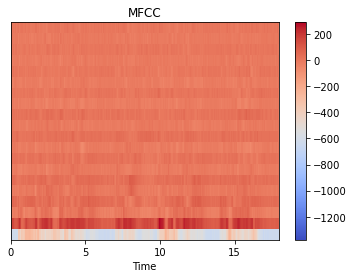

In [28]:
cnt=0

for audio in audio_list:
    audio_path = path + '/' + audio_list[cnt]
    file_code, ext = os.path.splitext(audio_path) 
    y, sr = librosa.load(audio_path, 16000)
    
    frame_length = 0.025
    frame_stride = 0.01
    sr = 16000

    n_fft_25 = int(round(sr * frame_length))
    hop_length_10 = int(round(sr * frame_stride))
    
    n_fft = n_fft_25 * 2
    win_length = n_fft_25
    hop_length = hop_length_10
    n_mels = 128 # default
    n_mfcc = 20 # default

    # mfcc에는 멜 스펙트로그램의 log값이 필요하다. 
    ## 원래는 logamplitude 함수로 변환하였으나, power를 db로 변환하는 과정 자체가 로그함수를 씌우는 것이기 때문에 power_to_db로 함수가 대체됨

    D = np.abs(librosa.stft(y, n_fft=n_fft, win_length = win_length, hop_length=hop_length))
    MS = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(D), sr=sr, n_mfcc=n_mfcc)
    
    plt.figure(figsize=(10, 4))
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
    fig.colorbar(img, ax=ax)
    ax.set(title='MFCC')
    plt.savefig(fname = file_code)
    plt.close(fig)
    
    
    print(str(cnt) + "/" + str(len(audio_list) - 1))
    cnt = cnt + 1
    if cnt == len(audio_list):
        print("MFCC transformation is finished!")
    